<a href="https://colab.research.google.com/github/italolima04/estudo-covid-19-quixada/blob/master/Estudo_COVID_Quixad%C3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e Dados

In [30]:
#Importando as bibliotecas.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet

In [31]:
#Importando os dados e criando um Data Frame a partir destes.
df = pd.read_csv('Covid-Qxd.csv')

# Explorando dados

In [32]:
#Visualizando às 5 primeiras linhas do Data Frame.
df.head()

,data,confirmados,recuperados,obitos
0,03/20/2020,0,0,0
1,03/21/2020,0,0,0
2,03/22/2020,0,0,0
3,03/23/2020,0,0,0
4,03/24/2020,0,0,0


In [33]:
#Visualizando às 5 últimas linhas do Data Frame.
df.tail()

,data,confirmados,recuperados,obitos
98,06/26/2020,2118,1598,48
99,06/27/2020,2149,1657,48
100,06/28/2020,2160,1688,49
101,06/29/2020,2189,1754,50
102,30-06-2020,2225,1781,50


In [34]:
#Verificando a estrutura do Data Frame.
df.shape

(103, 4)

# Manipulando Dados

**Feature Engineering -> Criação de uma Nova Coluna a partir de outras já existentes no Data Frame.**

In [35]:
#A Taxa de Mortalidade é calculada a partir da divisão do número de óbitos / casos confirmados. 
death_rate = df['obitos'] / df['confirmados']
#Multiplica-se por 100 para obter esse valor em porcentagem.
death_rate = death_rate * 100 
#Formatando o resultado para somente 2 casas decimais.
death_rate = death_rate.round(2)
death_rate

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
98     2.27
99     2.23
100    2.27
101    2.28
102    2.25
Length: 103, dtype: float64

In [36]:
#Criando uma coluna no Data Frame e preenchendo-a com os dados criados acima.
df['taxa_mortalidade'] = death_rate
df

,data,confirmados,recuperados,obitos,taxa_mortalidade
0,03/20/2020,0,0,0,NaN
1,03/21/2020,0,0,0,NaN
2,03/22/2020,0,0,0,NaN
3,03/23/2020,0,0,0,NaN
4,03/24/2020,0,0,0,NaN
...,...,...,...,...,...
98,06/26/2020,2118,1598,48,2.27
99,06/27/2020,2149,1657,48,2.23
100,06/28/2020,2160,1688,49,2.27
101,06/29/2020,2189,1754,50,2.28


**Pode-se observar que nos primeiros dias, como não havia óbitos registrados, o númerador da nossa divisão é 0, e o resultado desta gera um valor NaN, podemos tratar esses dados.**

In [37]:
#Verificando a quantidade de Valores Nulos por Coluna.
df.isna().sum()

data                0
confirmados         0
recuperados         0
obitos              0
taxa_mortalidade    8
dtype: int64

In [38]:
df['taxa_mortalidade'].isna()

0       True
1       True
2       True
3       True
4       True
       ...  
98     False
99     False
100    False
101    False
102    False
Name: taxa_mortalidade, Length: 103, dtype: bool

In [39]:
#Atualizando o Data Frame a partir da aplicação do Método fillna() que substitui os valores nulos por 0.
df.update(df['taxa_mortalidade'].fillna(0))
df

,data,confirmados,recuperados,obitos,taxa_mortalidade
0,03/20/2020,0,0,0,0.00
1,03/21/2020,0,0,0,0.00
2,03/22/2020,0,0,0,0.00
3,03/23/2020,0,0,0,0.00
4,03/24/2020,0,0,0,0.00
...,...,...,...,...,...
98,06/26/2020,2118,1598,48,2.27
99,06/27/2020,2149,1657,48,2.23
100,06/28/2020,2160,1688,49,2.27
101,06/29/2020,2189,1754,50,2.28


In [40]:
#A Taxa de Recuperados pode ser calculada a partir da divisão do número de recuperados / casos confirmados. 
recovered_rate = df['recuperados'] / df['confirmados']
#Multiplica-se por 100 para obter esse valor em porcentagem.
recovered_rate = recovered_rate * 100 
#Formatando o resultado para somente 2 casas decimais.
recovered_rate = recovered_rate.round(2)
recovered_rate

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
98     75.45
99     77.11
100    78.15
101    80.13
102    80.04
Length: 103, dtype: float64

In [41]:
#Criando uma coluna no Data Frame e preenchendo-a com os dados criados acima.
df['taxa_recuperados'] = recovered_rate
df

,data,confirmados,recuperados,obitos,taxa_mortalidade,taxa_recuperados
0,03/20/2020,0,0,0,0.00,NaN
1,03/21/2020,0,0,0,0.00,NaN
2,03/22/2020,0,0,0,0.00,NaN
3,03/23/2020,0,0,0,0.00,NaN
4,03/24/2020,0,0,0,0.00,NaN
...,...,...,...,...,...,...
98,06/26/2020,2118,1598,48,2.27,75.45
99,06/27/2020,2149,1657,48,2.23,77.11
100,06/28/2020,2160,1688,49,2.27,78.15
101,06/29/2020,2189,1754,50,2.28,80.13


**Pode-se observar que nos primeiros dias, como não pessoas recuperadas, o númerador da nossa divisão é 0, e o resultado desta gera um valor NaN, podemos tratar esses dados.**

In [42]:
#Verificando a quantidade de Valores Nulos por Coluna.
df.isna().sum()

data                0
confirmados         0
recuperados         0
obitos              0
taxa_mortalidade    0
taxa_recuperados    8
dtype: int64

In [43]:
df['taxa_recuperados'].isna()

0       True
1       True
2       True
3       True
4       True
       ...  
98     False
99     False
100    False
101    False
102    False
Name: taxa_recuperados, Length: 103, dtype: bool

In [44]:
#Atualizando o Data Frame a partir da aplicação do Método fillna() que substitui os valores nulos por 0.
df.update(df['taxa_recuperados'].fillna(0))
df

,data,confirmados,recuperados,obitos,taxa_mortalidade,taxa_recuperados
0,03/20/2020,0,0,0,0.00,0.00
1,03/21/2020,0,0,0,0.00,0.00
2,03/22/2020,0,0,0,0.00,0.00
3,03/23/2020,0,0,0,0.00,0.00
4,03/24/2020,0,0,0,0.00,0.00
...,...,...,...,...,...,...
98,06/26/2020,2118,1598,48,2.27,75.45
99,06/27/2020,2149,1657,48,2.23,77.11
100,06/28/2020,2160,1688,49,2.27,78.15
101,06/29/2020,2189,1754,50,2.28,80.13


**A nível de exploração, podemos Verificar a Porcentagem entre Casos Abertos e Fechados**

Um caso é dito aberto quando o paciente ainda se encontra doente(dado que testou positivo para o exame de COVID).

Um caso é dito fechado em duas possíveis situações: 

1.  Se o paciente se recuperou

2.  Se o paciente veio a óbito




In [45]:
#Calculando a quantidade de Casos fechados.
closed_cases = df['obitos'][(df['obitos'].size - 1)] + df['recuperados'][(df['recuperados'].size - 1)]
closed_cases

1831

In [46]:
#Porcentagem de Casos fechados em relação ao total.
((closed_cases/df['confirmados'][(df['confirmados'].size - 1)]) * 100).round(2)

82.29

In [47]:
#Calculando a quantidade de Casos abertos.
open_cases = ((df['confirmados'][(df['confirmados'].size - 1)]) - closed_cases)
open_cases

394

In [48]:
#Porcentagem de Casos abertos em relação ao total.
((open_cases/df['confirmados'][(df['confirmados'].size - 1)]) * 100).round(2)

17.71

In [49]:
#Verificando a Descrição Estatística dos Dados.
df.describe()

,confirmados,recuperados,obitos,taxa_mortalidade,taxa_recuperados
count,103.000000,103.000000,103.000000,103.000000,103.000000
mean,580.262136,382.466019,14.495146,1.494660,46.668447
std,740.842763,528.792684,18.127476,1.294016,30.702143
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.500000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,62.000000,1.000000,2.000000,56.670000
75%,1175.500000,733.500000,31.000000,2.565000,68.355000
max,2225.000000,1781.000000,50.000000,4.320000,90.910000


**A partir dessa descrição podemos fazer algumas observações, como:**

O Desvio Padrão tem valor muito elevado para os casos confirmados e recuperados pela grande variação que esses apresentam (crescimento).

A taxa de mortalidade máxima para a cidade de Quixadá foi 4.32%, ou seja, em seu ápice esse valor ainda é menor que a taxa atual para o Brasil. Taxa no Brasil no dia 24/06/2020: 4.6%

# Visualizando Gráficos

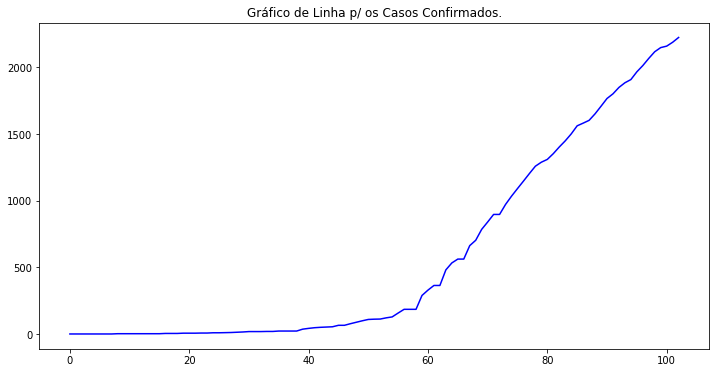

In [50]:
df['confirmados'].plot(figsize=(12, 6), color='blue')
plt.title('Gráfico de Linha p/ os Casos Confirmados.')
plt.show()

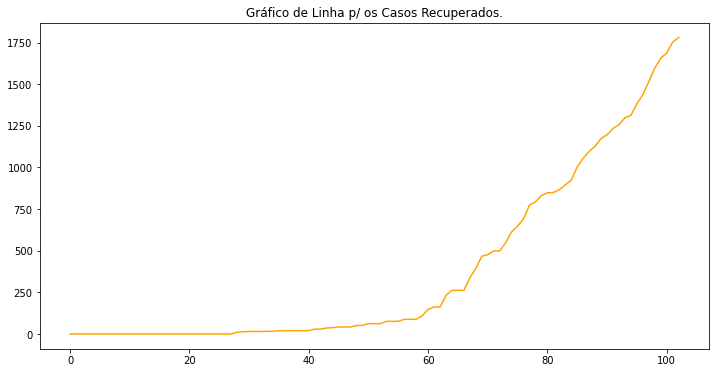

In [51]:
df['recuperados'].plot(figsize=(12, 6), color='orange')
plt.title('Gráfico de Linha p/ os Casos Recuperados.')
plt.show()

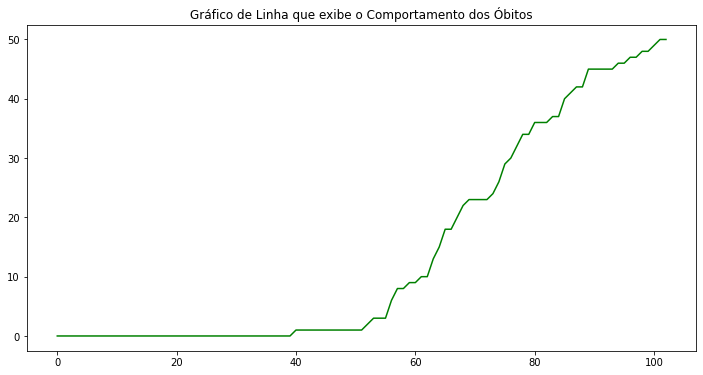

In [52]:
df['obitos'].plot(figsize=(12, 6), color='green')
plt.title('Gráfico de Linha que exibe o Comportamento dos Óbitos')
plt.show()

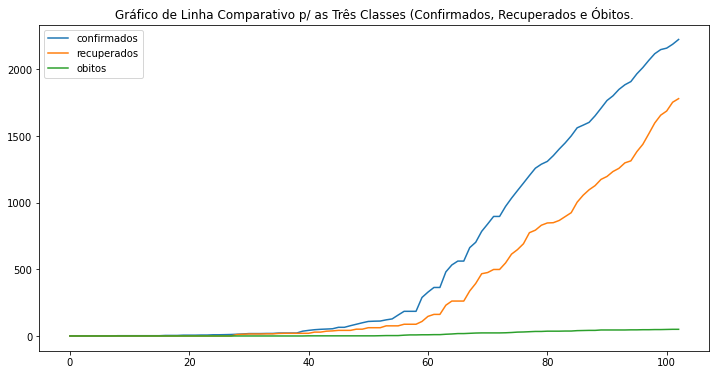

In [53]:
df_plot = df[['confirmados', 'recuperados', 'obitos']]
df_plot.plot(figsize=(12, 6))
plt.title('Gráfico de Linha Comparativo p/ as Três Classes (Confirmados, Recuperados e Óbitos.')
plt.show()

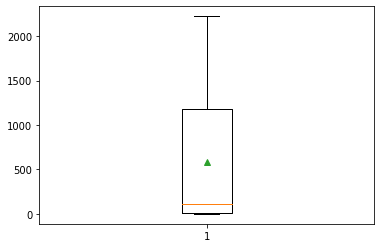

In [54]:
#Gráfico de Caixa p/ os Confirmados.
plt.boxplot(df['confirmados'], showmeans=True);

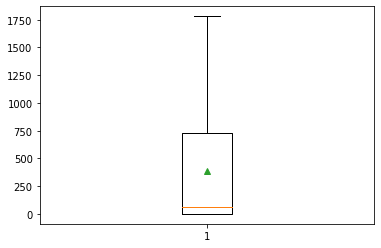

In [55]:
#Gráfico de Caixa p/ os Recuperados.
plt.boxplot(df['recuperados'], showmeans=True);

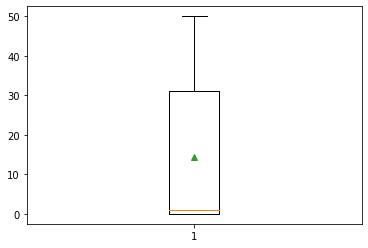

In [56]:
#Gráfico de Caixa p/ os Óbitos.
plt.boxplot(df['obitos'], showmeans=True);

#Formatando os Dados

**Prophet From Facebook**

O Prophet é um framework do Facebook e segue o modelo de API Scikit Learn (Biblioteca de Machine Learning bastente utilizada).
Ou seja: Primeiro cria-se uma instância da classe prophet e depois utiliza os métodos **fit** e **predict**. 

O Prophet tem seu backend programado em uma linguagem de programação probabilística chamada STAN, cuja é baseada nas estatísticas bayesianas e por isso pode oferecer vantagens para esses tipos de estudos.
Ex: Intervalos de Confiança

**Intervalo de Confiança**

Utilizaremos um intervalo de 95% de confiança, ou seja, teremos 5% de significância. Medida bastante utilizada para pesquisas.

Mas o que é um intervalo de confiança ?

Um intervalo de Confiança pode ser representado da seguinte forma:

c = média amostral - margem de erro < média populacional < média amostral + margem de erro

ds é uma coluna de date e deve possuir o formato esperado pelo Pandas: AAAA-MM-DD

y deve ser uma coluna numérica e representa a medida que desejamos prever

2 Critérios: 

1- Renomear colunas de acordo com o exigido pelo Prophet

2- Formatar data de acordo com o exigido pelo Prophet

In [57]:
#Criando Data Frame Vazio.
confirmed = pd.DataFrame()
#Criando coluna de Data e formatando esses dados para o Prophet.
confirmed['ds'] = pd.to_datetime(df['data'])
#Criando coluna de confirmados para o novo Data Frame.
confirmed['y'] = df['confirmados']
#Visualizando às 5 últimas linhas.
confirmed.tail()

,ds,y
98,2020-06-26,2118
99,2020-06-27,2149
100,2020-06-28,2160
101,2020-06-29,2189
102,2020-06-30,2225


In [58]:
#Verificando o formato dos dados.
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      103 non-null    datetime64[ns]
 1   y       103 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


In [97]:
#Criando Data Frame Vazio.
deaths = pd.DataFrame()
#Criando coluna de Data e formatando esses dados para o Prophet.
deaths['ds'] = pd.to_datetime(df['data'])
#Criando coluna de confirmados para o novo Data Frame.
deaths['y'] = df['obitos']
#Visualizando às 5 últimas linhas.
deaths.tail()

,ds,y
98,2020-06-26,48
99,2020-06-27,48
100,2020-06-28,49
101,2020-06-29,50
102,2020-06-30,50


In [98]:
#Verificando o formato dos dados.
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      103 non-null    datetime64[ns]
 1   y       103 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


# Instanciando e Configurando o Prophet para os dados de Confirmados

In [71]:
#Criando instância da Classe Prophet e estabelecendo o Nível de Confiança.
prophet = Prophet(interval_width=0.95)

In [72]:
#Treinando o Modelo.
prophet.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Será feita uma previsão para os próximos 7, 15 e 30 dias.**

# Prevendo o Número de Confirmados para os Próximos 7 dias

In [73]:
#Parâmetro que recebe a quantidade de dias.
confirmed_7 = prophet.make_future_dataframe(periods=7)
#Verificando quais serão esses próximos x dias
confirmed_7.tail(7)

,ds
103,2020-07-01
104,2020-07-02
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07


In [81]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(confirmed_7)
prevision.tail(7)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,2020-07-01,2303.011664,2278.669743,2326.167979,2301.300557,2304.867552,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,0.0,0.0,0.0,2302.079176
104,2020-07-02,2345.437613,2324.568698,2372.572747,2340.262815,2351.749053,2.030081,2.030081,2.030081,2.030081,2.030081,2.030081,0.0,0.0,0.0,2347.467694
105,2020-07-03,2387.863561,2368.911253,2421.681038,2377.056516,2399.416756,8.099243,8.099243,8.099243,8.099243,8.099243,8.099243,0.0,0.0,0.0,2395.962804
106,2020-07-04,2430.289510,2411.409153,2466.069589,2412.359806,2447.978065,7.844919,7.844919,7.844919,7.844919,7.844919,7.844919,0.0,0.0,0.0,2438.134428
107,2020-07-05,2472.715458,2434.518422,2499.495851,2448.136132,2498.714562,-4.756220,-4.756220,-4.756220,-4.756220,-4.756220,-4.756220,0.0,0.0,0.0,2467.959238
108,2020-07-06,2515.141407,2469.637567,2545.226097,2483.092708,2550.362338,-8.302780,-8.302780,-8.302780,-8.302780,-8.302780,-8.302780,0.0,0.0,0.0,2506.838627
109,2020-07-07,2557.567355,2509.949173,2600.209071,2518.472270,2602.422516,-3.982756,-3.982756,-3.982756,-3.982756,-3.982756,-3.982756,0.0,0.0,0.0,2553.584599


In [82]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(7)

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,2278.669743,2302.079176,2326.167979
104,2020-07-02,2324.568698,2347.467694,2372.572747
105,2020-07-03,2368.911253,2395.962804,2421.681038
106,2020-07-04,2411.409153,2438.134428,2466.069589
107,2020-07-05,2434.518422,2467.959238,2499.495851
108,2020-07-06,2469.637567,2506.838627,2545.226097
109,2020-07-07,2509.949173,2553.584599,2600.209071


In [83]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(7).round()

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,2279.0,2302.0,2326.0
104,2020-07-02,2325.0,2347.0,2373.0
105,2020-07-03,2369.0,2396.0,2422.0
106,2020-07-04,2411.0,2438.0,2466.0
107,2020-07-05,2435.0,2468.0,2499.0
108,2020-07-06,2470.0,2507.0,2545.0
109,2020-07-07,2510.0,2554.0,2600.0


Função que plota o gráfico exibindo a comparação entre linha dos dados e a da previsão (que se ajusta de acordo com o intervalo de confiança).


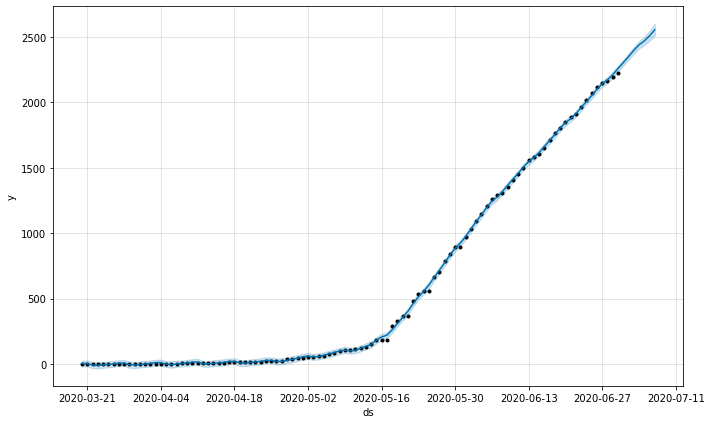

In [85]:
confirmed_fore_cast_plot =  prophet.plot(prevision)

# Prevendo o Número de Confirmados para os próximos 15 dias

In [86]:
#Parâmetro que recebe a quantidade de dias.
confirmed_15 = prophet.make_future_dataframe(periods=15)
#Verificando quais serão esses próximos x dias
confirmed_15.tail(15)

,ds
103,2020-07-01
104,2020-07-02
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09
112,2020-07-10


In [87]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(confirmed_15)
prevision.tail(15)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,2020-07-01,2303.011664,2279.313062,2324.788260,2301.492686,2304.502986,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,0.0,0.0,0.0,2302.079176
104,2020-07-02,2345.437613,2322.640560,2372.027123,2340.132761,2351.815866,2.030081,2.030081,2.030081,2.030081,2.030081,2.030081,0.0,0.0,0.0,2347.467694
105,2020-07-03,2387.863561,2372.871759,2422.288666,2377.492275,2398.817505,8.099243,8.099243,8.099243,8.099243,8.099243,8.099243,0.0,0.0,0.0,2395.962804
106,2020-07-04,2430.289510,2409.603771,2465.932394,2413.636068,2446.471394,7.844919,7.844919,7.844919,7.844919,7.844919,7.844919,0.0,0.0,0.0,2438.134428
107,2020-07-05,2472.715458,2435.470570,2500.988903,2448.454784,2494.653818,-4.756220,-4.756220,-4.756220,-4.756220,-4.756220,-4.756220,0.0,0.0,0.0,2467.959238
108,2020-07-06,2515.141407,2468.975906,2546.078782,2483.284610,2545.578741,-8.302780,-8.302780,-8.302780,-8.302780,-8.302780,-8.302780,0.0,0.0,0.0,2506.838627
109,2020-07-07,2557.567355,2507.384183,2596.711396,2518.076992,2595.827589,-3.982756,-3.982756,-3.982756,-3.982756,-3.982756,-3.982756,0.0,0.0,0.0,2553.584599
110,2020-07-08,2599.993304,2549.682293,2650.792204,2550.889368,2651.178580,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,0.0,0.0,0.0,2599.060816
111,2020-07-09,2642.419252,2579.083867,2707.327575,2585.379249,2702.993072,2.030081,2.030081,2.030081,2.030081,2.030081,2.030081,0.0,0.0,0.0,2644.449333
112,2020-07-10,2684.845201,2621.278385,2762.112638,2615.684505,2753.083748,8.099243,8.099243,8.099243,8.099243,8.099243,8.099243,0.0,0.0,0.0,2692.944444


In [88]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(15)

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,2279.313062,2302.079176,2324.788260
104,2020-07-02,2322.640560,2347.467694,2372.027123
105,2020-07-03,2372.871759,2395.962804,2422.288666
106,2020-07-04,2409.603771,2438.134428,2465.932394
107,2020-07-05,2435.470570,2467.959238,2500.988903
108,2020-07-06,2468.975906,2506.838627,2546.078782
109,2020-07-07,2507.384183,2553.584599,2596.711396
110,2020-07-08,2549.682293,2599.060816,2650.792204
111,2020-07-09,2579.083867,2644.449333,2707.327575
112,2020-07-10,2621.278385,2692.944444,2762.112638


In [89]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(15).round()

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,2279.0,2302.0,2325.0
104,2020-07-02,2323.0,2347.0,2372.0
105,2020-07-03,2373.0,2396.0,2422.0
106,2020-07-04,2410.0,2438.0,2466.0
107,2020-07-05,2435.0,2468.0,2501.0
108,2020-07-06,2469.0,2507.0,2546.0
109,2020-07-07,2507.0,2554.0,2597.0
110,2020-07-08,2550.0,2599.0,2651.0
111,2020-07-09,2579.0,2644.0,2707.0
112,2020-07-10,2621.0,2693.0,2762.0


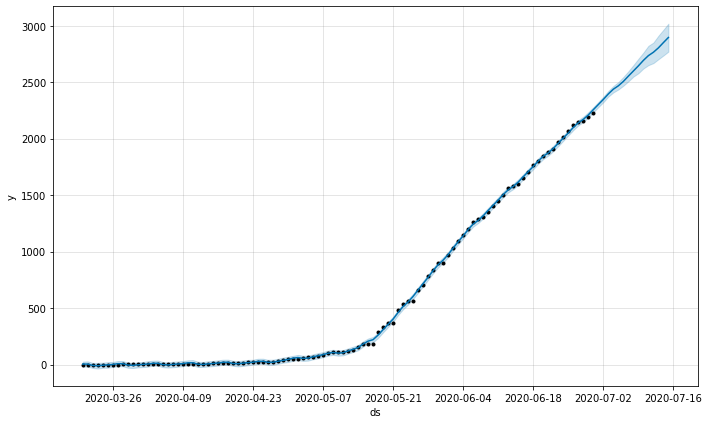

In [90]:
confirmed_fore_cast_plot =  prophet.plot(prevision)

# Prevendo o Número de Confirmados para os próximos 30 dias

In [91]:
#Parâmetro que recebe a quantidade de dias.
confirmed_30 = prophet.make_future_dataframe(periods=30)
#Verificando quais serão esses próximos x dias
confirmed_30.tail(30)

,ds
103,2020-07-01
104,2020-07-02
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09
112,2020-07-10


In [92]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(confirmed_30)
prevision.tail(30)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,2020-07-01,2303.011664,2279.727937,2324.668678,2301.756537,2304.485398,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,0.0,0.0,0.0,2302.079176
104,2020-07-02,2345.437613,2324.031157,2370.122692,2340.778819,2351.486531,2.030081,2.030081,2.030081,2.030081,2.030081,2.030081,0.0,0.0,0.0,2347.467694
105,2020-07-03,2387.863561,2371.780439,2418.831548,2378.136823,2399.199552,8.099243,8.099243,8.099243,8.099243,8.099243,8.099243,0.0,0.0,0.0,2395.962804
106,2020-07-04,2430.289510,2410.457476,2465.392717,2414.212635,2447.014056,7.844919,7.844919,7.844919,7.844919,7.844919,7.844919,0.0,0.0,0.0,2438.134428
107,2020-07-05,2472.715458,2439.971402,2501.227484,2448.047502,2496.139807,-4.756220,-4.756220,-4.756220,-4.756220,-4.756220,-4.756220,0.0,0.0,0.0,2467.959238
108,2020-07-06,2515.141407,2470.695018,2547.575515,2481.969278,2547.039641,-8.302780,-8.302780,-8.302780,-8.302780,-8.302780,-8.302780,0.0,0.0,0.0,2506.838627
109,2020-07-07,2557.567355,2506.075751,2596.217088,2515.936558,2598.939309,-3.982756,-3.982756,-3.982756,-3.982756,-3.982756,-3.982756,0.0,0.0,0.0,2553.584599
110,2020-07-08,2599.993304,2546.461363,2652.006494,2550.130013,2651.111561,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,-0.932488,0.0,0.0,0.0,2599.060816
111,2020-07-09,2642.419252,2581.326348,2712.724797,2584.194861,2702.865607,2.030081,2.030081,2.030081,2.030081,2.030081,2.030081,0.0,0.0,0.0,2644.449333
112,2020-07-10,2684.845201,2626.853409,2771.976659,2615.963667,2754.984787,8.099243,8.099243,8.099243,8.099243,8.099243,8.099243,0.0,0.0,0.0,2692.944444


In [93]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(30)

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,2279.727937,2302.079176,2324.668678
104,2020-07-02,2324.031157,2347.467694,2370.122692
105,2020-07-03,2371.780439,2395.962804,2418.831548
106,2020-07-04,2410.457476,2438.134428,2465.392717
107,2020-07-05,2439.971402,2467.959238,2501.227484
108,2020-07-06,2470.695018,2506.838627,2547.575515
109,2020-07-07,2506.075751,2553.584599,2596.217088
110,2020-07-08,2546.461363,2599.060816,2652.006494
111,2020-07-09,2581.326348,2644.449333,2712.724797
112,2020-07-10,2626.853409,2692.944444,2771.976659


In [94]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(30).round()

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,2280.0,2302.0,2325.0
104,2020-07-02,2324.0,2347.0,2370.0
105,2020-07-03,2372.0,2396.0,2419.0
106,2020-07-04,2410.0,2438.0,2465.0
107,2020-07-05,2440.0,2468.0,2501.0
108,2020-07-06,2471.0,2507.0,2548.0
109,2020-07-07,2506.0,2554.0,2596.0
110,2020-07-08,2546.0,2599.0,2652.0
111,2020-07-09,2581.0,2644.0,2713.0
112,2020-07-10,2627.0,2693.0,2772.0


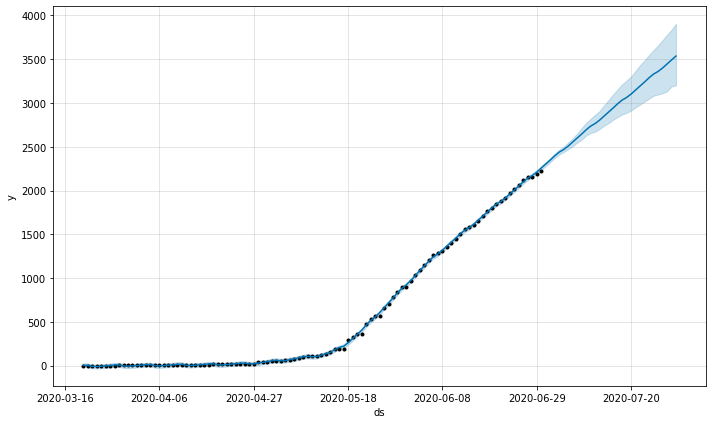

In [95]:
confirmed_fore_cast_plot =  prophet.plot(prevision)

**Observe que quanto maior a quantidade de dias, maior a "margem" de erro estabelecida, isso se dá devido a baixa quantidade de dados para o treinamento do modelo.**

# Instanciando e Configurando o Prophet para os dados de Mortes

In [99]:
#Criando instância da Classe Prophet e estabelecendo o Nível de Confiança.
prophet = Prophet(interval_width=0.95)

In [100]:
#Treinando o Modelo.
prophet.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Será feita uma previsão para os próximos 7, 15 e 30 dias.**

# Prevendo o Número de Mortes para os Próximos 7 dias

In [101]:
#Parâmetro que recebe a quantidade de dias.
deaths_7 = prophet.make_future_dataframe(periods=7)
#Verificando quais serão esses próximos x dias
deaths_7.tail(7)

,ds
103,2020-07-01
104,2020-07-02
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07


In [102]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(deaths_7)
prevision.tail(7)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,2020-07-01,52.362510,50.757388,54.361920,52.303849,52.411798,0.182545,0.182545,0.182545,0.182545,0.182545,0.182545,0.0,0.0,0.0,52.545055
104,2020-07-02,53.105102,51.353563,54.727588,52.920368,53.280127,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,0.0,0.0,0.0,53.005743
105,2020-07-03,53.847693,52.080492,55.759763,53.495227,54.197311,0.034357,0.034357,0.034357,0.034357,0.034357,0.034357,0.0,0.0,0.0,53.882050
106,2020-07-04,54.590285,52.846985,56.526930,54.058593,55.121279,0.129040,0.129040,0.129040,0.129040,0.129040,0.129040,0.0,0.0,0.0,54.719324
107,2020-07-05,55.332876,53.440177,57.162787,54.636967,56.059919,-0.032494,-0.032494,-0.032494,-0.032494,-0.032494,-0.032494,0.0,0.0,0.0,55.300382
108,2020-07-06,56.075467,54.208195,58.022604,55.164009,57.013097,-0.006087,-0.006087,-0.006087,-0.006087,-0.006087,-0.006087,0.0,0.0,0.0,56.069380
109,2020-07-07,56.818059,54.426341,58.680119,55.615930,57.998735,-0.208003,-0.208003,-0.208003,-0.208003,-0.208003,-0.208003,0.0,0.0,0.0,56.610056


In [103]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(7)

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,50.757388,52.545055,54.361920
104,2020-07-02,51.353563,53.005743,54.727588
105,2020-07-03,52.080492,53.882050,55.759763
106,2020-07-04,52.846985,54.719324,56.526930
107,2020-07-05,53.440177,55.300382,57.162787
108,2020-07-06,54.208195,56.069380,58.022604
109,2020-07-07,54.426341,56.610056,58.680119


In [104]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(7).round()

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,51.0,53.0,54.0
104,2020-07-02,51.0,53.0,55.0
105,2020-07-03,52.0,54.0,56.0
106,2020-07-04,53.0,55.0,57.0
107,2020-07-05,53.0,55.0,57.0
108,2020-07-06,54.0,56.0,58.0
109,2020-07-07,54.0,57.0,59.0


Função que plota o gráfico exibindo a comparação entre linha dos dados e a da previsão (que se ajusta de acordo com o intervalo de confiança).


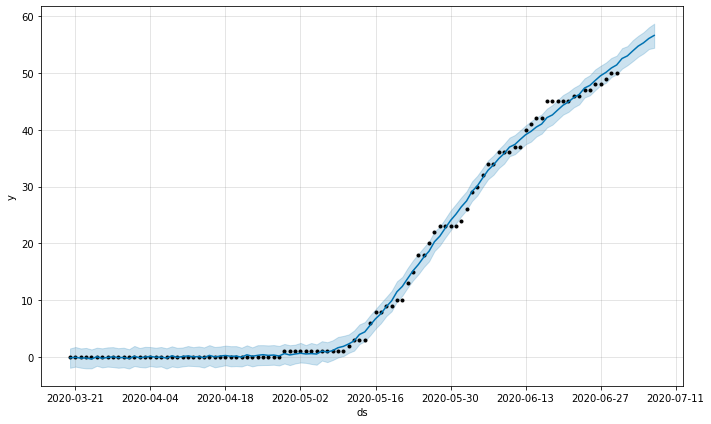

In [106]:
deaths_fore_cast_plot =  prophet.plot(prevision)

# Prevendo o Número de Mortes para os próximos 15 dias

In [107]:
#Parâmetro que recebe a quantidade de dias.
deaths_15 = prophet.make_future_dataframe(periods=15)
#Verificando quais serão esses próximos x dias
deaths_15.tail(15)

,ds
103,2020-07-01
104,2020-07-02
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09
112,2020-07-10


In [108]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(deaths_15)
prevision.tail(15)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,2020-07-01,52.362510,50.947123,54.350297,52.317759,52.410987,0.182545,0.182545,0.182545,0.182545,0.182545,0.182545,0.0,0.0,0.0,52.545055
104,2020-07-02,53.105102,51.252799,54.741257,52.932706,53.274996,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,0.0,0.0,0.0,53.005743
105,2020-07-03,53.847693,52.285059,55.792576,53.510971,54.166434,0.034357,0.034357,0.034357,0.034357,0.034357,0.034357,0.0,0.0,0.0,53.882050
106,2020-07-04,54.590285,52.996529,56.597163,54.054691,55.073101,0.129040,0.129040,0.129040,0.129040,0.129040,0.129040,0.0,0.0,0.0,54.719324
107,2020-07-05,55.332876,53.460203,57.190558,54.596056,56.042711,-0.032494,-0.032494,-0.032494,-0.032494,-0.032494,-0.032494,0.0,0.0,0.0,55.300382
108,2020-07-06,56.075467,54.109440,57.940076,55.133295,57.007345,-0.006087,-0.006087,-0.006087,-0.006087,-0.006087,-0.006087,0.0,0.0,0.0,56.069380
109,2020-07-07,56.818059,54.520847,58.874782,55.674111,58.002416,-0.208003,-0.208003,-0.208003,-0.208003,-0.208003,-0.208003,0.0,0.0,0.0,56.610056
110,2020-07-08,57.560650,55.641942,59.771425,56.180346,59.002988,0.182545,0.182545,0.182545,0.182545,0.182545,0.182545,0.0,0.0,0.0,57.743195
111,2020-07-09,58.303242,55.888292,60.474573,56.712425,60.011509,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,0.0,0.0,0.0,58.203884
112,2020-07-10,59.045833,56.552136,61.625913,57.139571,61.156768,0.034357,0.034357,0.034357,0.034357,0.034357,0.034357,0.0,0.0,0.0,59.080190


In [109]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(15)

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,50.947123,52.545055,54.350297
104,2020-07-02,51.252799,53.005743,54.741257
105,2020-07-03,52.285059,53.882050,55.792576
106,2020-07-04,52.996529,54.719324,56.597163
107,2020-07-05,53.460203,55.300382,57.190558
108,2020-07-06,54.109440,56.069380,57.940076
109,2020-07-07,54.520847,56.610056,58.874782
110,2020-07-08,55.641942,57.743195,59.771425
111,2020-07-09,55.888292,58.203884,60.474573
112,2020-07-10,56.552136,59.080190,61.625913


In [110]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(15).round()

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,51.0,53.0,54.0
104,2020-07-02,51.0,53.0,55.0
105,2020-07-03,52.0,54.0,56.0
106,2020-07-04,53.0,55.0,57.0
107,2020-07-05,53.0,55.0,57.0
108,2020-07-06,54.0,56.0,58.0
109,2020-07-07,55.0,57.0,59.0
110,2020-07-08,56.0,58.0,60.0
111,2020-07-09,56.0,58.0,60.0
112,2020-07-10,57.0,59.0,62.0


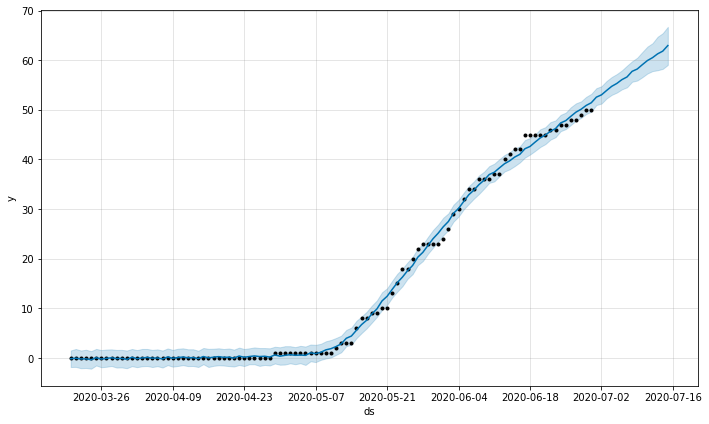

In [111]:
deaths =  prophet.plot(prevision)

# Prevendo o Número de Mortes para os próximos 30 dias

In [112]:
#Parâmetro que recebe a quantidade de dias.
deaths_30 = prophet.make_future_dataframe(periods=30)
#Verificando quais serão esses próximos x dias
deaths_30.tail(30)

,ds
103,2020-07-01
104,2020-07-02
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09
112,2020-07-10


In [113]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(deaths_30)
prevision.tail(30)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,2020-07-01,52.362510,50.843416,54.252420,52.312960,52.410343,0.182545,0.182545,0.182545,0.182545,0.182545,0.182545,0.0,0.0,0.0,52.545055
104,2020-07-02,53.105102,51.333935,54.657457,52.921466,53.261311,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,0.0,0.0,0.0,53.005743
105,2020-07-03,53.847693,52.191183,55.735438,53.496674,54.185026,0.034357,0.034357,0.034357,0.034357,0.034357,0.034357,0.0,0.0,0.0,53.882050
106,2020-07-04,54.590285,52.990367,56.353915,54.046845,55.133588,0.129040,0.129040,0.129040,0.129040,0.129040,0.129040,0.0,0.0,0.0,54.719324
107,2020-07-05,55.332876,53.522962,57.198762,54.640746,56.122889,-0.032494,-0.032494,-0.032494,-0.032494,-0.032494,-0.032494,0.0,0.0,0.0,55.300382
108,2020-07-06,56.075467,54.250082,57.912444,55.141689,57.069514,-0.006087,-0.006087,-0.006087,-0.006087,-0.006087,-0.006087,0.0,0.0,0.0,56.069380
109,2020-07-07,56.818059,54.547088,58.548066,55.641327,58.056609,-0.208003,-0.208003,-0.208003,-0.208003,-0.208003,-0.208003,0.0,0.0,0.0,56.610056
110,2020-07-08,57.560650,55.545969,59.922353,56.095126,58.980476,0.182545,0.182545,0.182545,0.182545,0.182545,0.182545,0.0,0.0,0.0,57.743195
111,2020-07-09,58.303242,55.967358,60.424145,56.582778,59.937493,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,-0.099358,0.0,0.0,0.0,58.203884
112,2020-07-10,59.045833,56.407463,61.350794,57.032309,60.931666,0.034357,0.034357,0.034357,0.034357,0.034357,0.034357,0.0,0.0,0.0,59.080190


In [114]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(30)

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,50.843416,52.545055,54.252420
104,2020-07-02,51.333935,53.005743,54.657457
105,2020-07-03,52.191183,53.882050,55.735438
106,2020-07-04,52.990367,54.719324,56.353915
107,2020-07-05,53.522962,55.300382,57.198762
108,2020-07-06,54.250082,56.069380,57.912444
109,2020-07-07,54.547088,56.610056,58.548066
110,2020-07-08,55.545969,57.743195,59.922353
111,2020-07-09,55.967358,58.203884,60.424145
112,2020-07-10,56.407463,59.080190,61.350794


In [115]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(30).round()

,ds,yhat_lower,yhat,yhat_upper
103,2020-07-01,51.0,53.0,54.0
104,2020-07-02,51.0,53.0,55.0
105,2020-07-03,52.0,54.0,56.0
106,2020-07-04,53.0,55.0,56.0
107,2020-07-05,54.0,55.0,57.0
108,2020-07-06,54.0,56.0,58.0
109,2020-07-07,55.0,57.0,59.0
110,2020-07-08,56.0,58.0,60.0
111,2020-07-09,56.0,58.0,60.0
112,2020-07-10,56.0,59.0,61.0


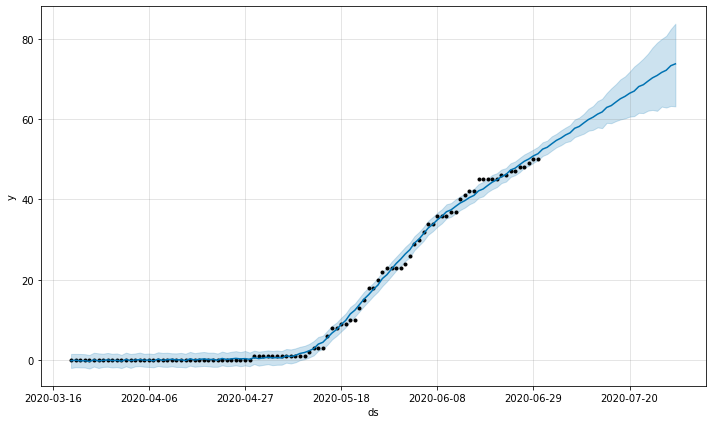

In [116]:
deaths_fore_cast_plot =  prophet.plot(prevision)

**Observe que quanto maior a quantidade de dias, maior a "margem" de erro estabelecida, isso se dá devido a baixa quantidade de dados para o treinamento do modelo.**